This project will look into how well Random Forests will be to detect the staisfactory rating given a set of parameters for the model to choose from. 

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
import seaborn 
import pandas as pd


In [21]:
original_fitness_csv = pd.read_csv('C:/Users/zeroc/OneDrive/Desktop/PortfolioProjects/Fitnessdata/megaGymDataset.csv')

#for cleaning purposes dropped all NaN values

columns = ["Type", "BodyPart", "Equipment", "Level", "Rating"]

fitness_csv = original_fitness_csv[columns]

fitness_csv = fitness_csv.dropna()

#this is what original encoder does. replaces string values with a numerical value
'''
for featurename in features:
    allcolumnlist = fitness_csv[featurename].tolist()
    columnlist = []
    for values in allcolumnlist:
        if values not in columnlist:
            columnlist.append(values)

    valuecount = 1
    for values in columnlist:
        if values != 0:
            fitness_csv[featurename] = fitness_csv[featurename].replace(to_replace = values, value = valuecount)
            valuecount += 1
        else:
            fitness_csv[featurename] = fitness_csv[featurename].replace(to_replace = values, value = 0)
'''

ord_enc = OrdinalEncoder()

#fit_transform is the call to turn string into numerical. Must take in a 2-d array hence why there is 2 brackets
fitness_csv["Type"] = ord_enc.fit_transform(fitness_csv[["Type"]])
fitness_csv["BodyPart"] = ord_enc.fit_transform(fitness_csv[["BodyPart"]])
fitness_csv["Equipment"] = ord_enc.fit_transform(fitness_csv[["Equipment"]])
fitness_csv["Level"] = ord_enc.fit_transform(fitness_csv[["BodyPart"]])

fitness_csv[:]

,Type,BodyPart,Equipment,Level,Rating
0,4.0,0.0,0.0,0.0,0.0
8,4.0,0.0,1.0,0.0,8.9
9,4.0,0.0,1.0,0.0,8.9
10,4.0,0.0,1.0,0.0,8.5
11,4.0,0.0,1.0,0.0,8.3
...,...,...,...,...,...
2910,2.0,16.0,10.0,16.0,8.2
2911,4.0,16.0,5.0,16.0,9.3
2912,4.0,16.0,5.0,16.0,9.0
2913,4.0,16.0,5.0,16.0,8.1


I then looked at some pairplots of the the given features, dropping the target column. 

c:\Users\zeroc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


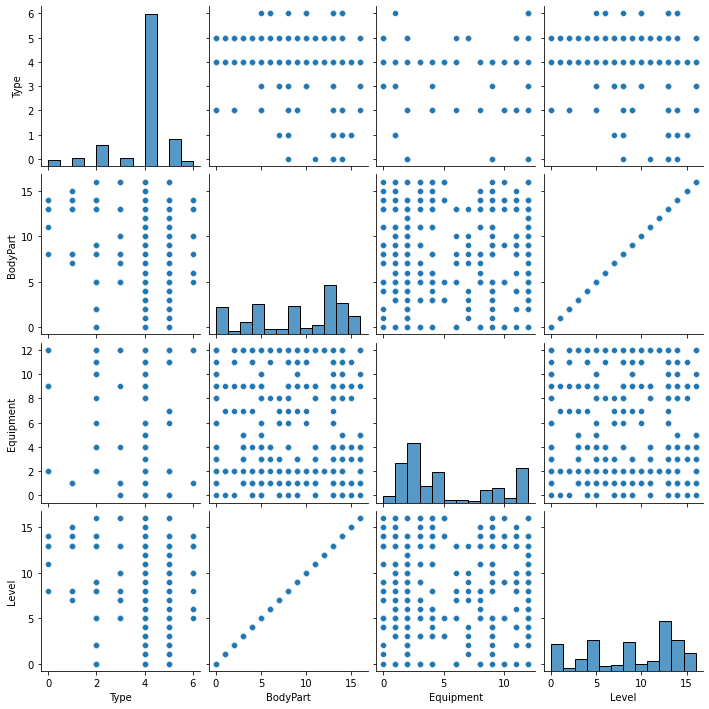

In [33]:
seaborn.pairplot(fitness_csv.drop("Rating", axis = 1))

Also did a heatplot to see the correlation between each column of the fitness_csv Dataframe a bit better using a Correlation matrix

<Axes: >

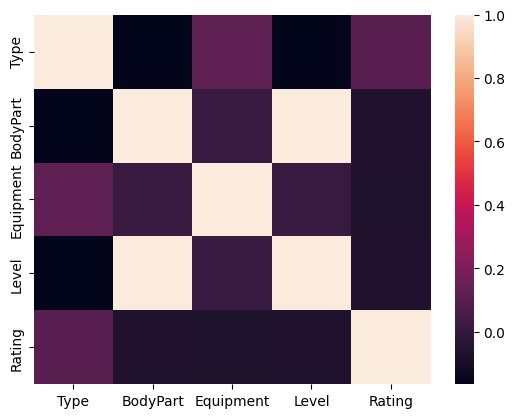

In [35]:
seaborn.heatmap(fitness_csv.corr(), xticklabels = fitness_csv.columns, yticklabels = fitness_csv.columns)

Notcing the heatmap, there isn't a lot of correlation between any of the features except for themselves and suprisingly BodyPart and Level. Will see how the model predicts. 

I then split the data into validation and training in order to get better accuracy. 

In [37]:
features = ["Type", "BodyPart", "Equipment", "Level"]
X = fitness_csv[features]
y = fitness_csv.Rating

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

I ran the Random Forest Regression getting a MSE of 11.552 and a MAE of 2.540, which seems low at first, but I realized some issues with the choice of model. 

In [38]:
rf_model = RandomForestRegressor(random_state = 1)
rf_model.fit(train_X, train_y)
rf_predictions = rf_model.predict(val_X)

mse = mean_squared_error(val_y, rf_predictions)
mae = mean_absolute_error(val_y, rf_predictions)

print("The Mean Squared Error was as follows: " + str(mse))
print("The Mean Absolute Error was as follows: " + str(mae))

The Mean Squared Error was as follows: 11.55162924501834
The Mean Absolute Error was as follows: 2.5401682991729078


Firstly I chose a Regression model because my predictions were going to be on a continous spectrum. However, after getting the accuracy metrics, I realized a crucial mistake in choosing this model. My choice of features were not a continous spectrum of data. Rather, most of the feature were actually labels and thus had a discrete number of choices. I will look to see if classifers will prove any different and whether or not classifiers will predict the data better. Furthermore, instead of choosing rating as the prediction values, I will decided to use RatingDesc instead as those can be categorized into different labels, especially with models such as RandomForestClassifier or Naive-Bayes